# Train DataSet

In [210]:
#import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os

In [181]:
#read the data
df_train = pd.read_csv(os.getcwd()+"/data/train_lyrics_1000.csv")


df_train.head()

,file,artist,title,lyrics,genre,mood,year
0,TRAAAAW128F429D538.h5,Casual,I Didn't Mean To,Verse One:\n\nAlright I might\nHave had a litt...,Hip Hop/Rap,sad,1994
1,TRAAAEF128F4273421.h5,Adam Ant,Something Girls,Adam Ant/Marco Pirroni\nEvery girl is a someth...,Rock,happy,1982
2,TRAAAFD128F92F423A.h5,Gob,Face the Ashes,"I've just erased it's been a while, I've got a...",Rock,sad,2007
3,TRAABJV128F1460C49.h5,Lionel Richie,Tonight Will Be Alright,Little darling \nWhere you've been so long \nI...,R&B,happy,1986
4,TRAABLR128F423B7E3.h5,Blue Rodeo,Floating,"Lead Vocal by Greg\n\nWell, these late night c...",Rock,sad,1987


In [182]:
#identify the null values

df_train[df_train.isnull().any(axis = 1)]

,file,artist,title,lyrics,genre,mood,year


Genres from Training data set
['Hip Hop/Rap', 'Rock', 'R&B', 'Pop', 'Jazz', 'Country', 'Blues', 'Electronic', 'Soul', 'Ska', 'Christian', 'Dance']
 


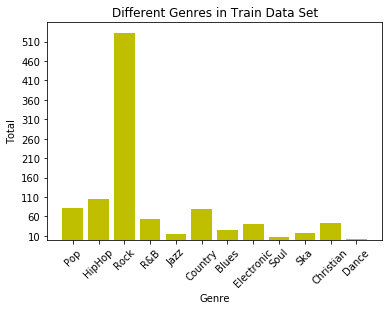

<Figure size 360x576 with 0 Axes>

In [197]:
print("Genres from Training data set")
print(df_train['genre'].unique().tolist())
training_genre = df_train['genre'].unique().tolist()

print(" ")


# df_train['genre'].value_counts()

pop = sum(df_train.loc[:, 'genre'] == 'Pop')
hiphop = sum(df_train.loc[:, 'genre'] == 'Hip Hop/Rap')
rock = sum(df_train.loc[:, 'genre'] == 'Rock')
rb = sum(df_train.loc[:, 'genre'] == 'R&B')
jazz = sum(df_train.loc[:, 'genre'] == 'Jazz')
cnt = sum(df_train.loc[:, 'genre'] == 'Country')
bl = sum(df_train.loc[:, 'genre'] == 'Blues')
elec = sum(df_train.loc[:, 'genre'] == 'Electronic')
soul = sum(df_train.loc[:, 'genre'] == 'Soul')
ska = sum(df_train.loc[:, 'genre'] == 'Ska')
chrs = sum(df_train.loc[:, 'genre'] == 'Christian')
dnc = sum(df_train.loc[:, 'genre'] == 'Dance')

x_axis = ['Pop','HipHop','Rock','R&B','Jazz','Country','Blues','Electronic','Soul','Ska','Christian','Dance']
y_axis = (pop,hiphop,rock,rb,jazz,cnt,bl,elec,soul,ska,chrs,dnc) 

# test = df_test['genre'].value_counts()

plt.bar(x_axis,y_axis,align = 'center', color='y')
plt.tick_params(axis ='x', rotation = 45)
plt.yticks(np.arange(10,540, step= 50))
plt.ylabel('Total')
plt.xlabel('Genre')
plt.title('Different Genres in Train Data Set')
plt.figure(figsize=(5,8))
plt.show()


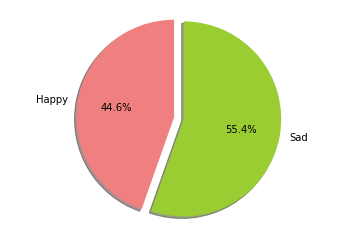

In [184]:
#Ratio of song mood
happy = sum(df_train.loc[:, 'mood'] == 'happy')

sad = sum(df_train.loc[:, 'mood'] == 'sad')

total = len(df_train)

sizes = (happy,sad)

labels = 'Happy','Sad'

explode = (0.1, 0) 

colors = ['lightcoral', 'yellowgreen']

plt.pie(sizes,explode=explode,  labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

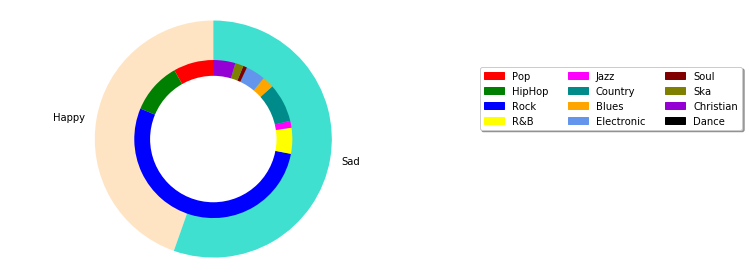

In [193]:
labels_genre = ['Pop','HipHop','Rock','R&B','Jazz','Country','Blues','Electronic','Soul','Ska','Christian','Dance']
sizes_genre = [pop,hiphop,rock,rb,jazz,cnt,bl,elec,soul,ska,chrs,dnc]

colors = ['bisque', 'turquoise']

colors_genre = ['red','green','blue','yellow','magenta','darkcyan','orange','cornflowerblue','maroon','olive','darkviolet','black']

# explode = (0.2,0.2) 
# explode_genre = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)

#Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True,radius=3)
plt.pie(sizes_genre, colors=colors_genre,startangle=90,radius=2 )

#Draw circle
centre_circle = plt.Circle((0,0),1.6,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()

pop_patch = mpatches.Patch(color= colors_genre[0], label='Pop')
hp_patch = mpatches.Patch(color= colors_genre[1], label='HipHop')
rk_patch = mpatches.Patch(color= colors_genre[2], label='Rock')
rb_patch = mpatches.Patch(color= colors_genre[3], label='R&B')
jz_patch = mpatches.Patch(color= colors_genre[4], label='Jazz')
cn_patch = mpatches.Patch(color= colors_genre[5], label='Country')
bl_patch = mpatches.Patch(color= colors_genre[6], label='Blues')
el_patch = mpatches.Patch(color= colors_genre[7], label='Electronic')
so_patch = mpatches.Patch(color= colors_genre[8], label='Soul')
sk_patch = mpatches.Patch(color= colors_genre[9], label='Ska')
ch_patch = mpatches.Patch(color= colors_genre[10], label='Christian')
dn_patch = mpatches.Patch(color= colors_genre[11], label='Dance')

plt.legend(handles=[pop_patch,hp_patch,rk_patch,rb_patch,jz_patch,cn_patch,bl_patch,el_patch,so_patch,
                    sk_patch,ch_patch,dn_patch], bbox_to_anchor=(1.15, 0.8), shadow=True, ncol=3)



plt.show()

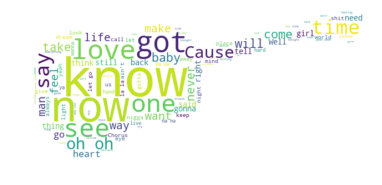

<Figure size 1080x1800 with 0 Axes>

In [228]:
#Wordcloud to identify words in the lyrics

text = " ".join(review for review in df_train.lyrics)

stopwords = set(STOPWORDS)

note_mask = np.array(Image.open(os.getcwd()+ "/img/img.jpg"))

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=100,mask=note_mask).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=[15,25])
plt.show()

# Test Data Set

In [186]:
#read the data
df_test =  pd.read_csv(os.getcwd()+"/data/valid_lyrics_200.csv")

df_test.head()

,file,artist,title,genre,lyrics,mood
0,TRAFAIB128F426E636.h5,Placebo,Where Is My Mind (XFM Live Version),Pop,Ooooohh\nOoooohh\nOoooohh\nOoooohh\n\nWith you...,happy
1,TRAFAJC128E078888B.h5,Queens Of The Stone Age,This Lullaby,Rock,"Where, oh, where have you been, my love?\nWher...",sad
2,TRAFBBP128F92F6CC9.h5,MC5,Looking At You (Cody High School),Rock,When it happened \nsomething snapped inside \n...,happy
3,TRAFBVU128F426B3F6.h5,Dimmu Borgir,The Fundamental Alienation,Rock,My eyes got blinded\nAnd conned by the light\n...,sad
4,TRAFEEO12903CFEC87.h5,Dark Fortress,The Silver Gate,Rock,"[Music: V Santura, Lyrics: Morean]\n\nAwake, a...",sad


In [187]:
#identify the null values

df_test[df_test.isnull().any(axis = 1)]

,file,artist,title,genre,lyrics,mood


Genres from Valid data set
['Pop', 'Rock', 'Christian', 'Hip Hop/Rap', 'Electronic', 'Country', 'Jazz', 'R&B', 'Ska', 'Blues', 'Soul', 'Dance']


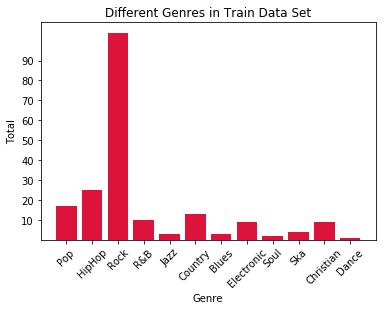

<Figure size 360x576 with 0 Axes>

In [194]:
print("Genres from Valid data set")
print(df_test['genre'].unique().tolist())
testing_genre = df_test['genre'].unique().tolist()


tpop = sum(df_test.loc[:, 'genre'] == 'Pop')
thiphop = sum(df_test.loc[:, 'genre'] == 'Hip Hop/Rap')
trock = sum(df_test.loc[:, 'genre'] == 'Rock')
trb = sum(df_test.loc[:, 'genre'] == 'R&B')
tjazz = sum(df_test.loc[:, 'genre'] == 'Jazz')
tcnt = sum(df_test.loc[:, 'genre'] == 'Country')
tbl = sum(df_test.loc[:, 'genre'] == 'Blues')
telec = sum(df_test.loc[:, 'genre'] == 'Electronic')
tsoul = sum(df_test.loc[:, 'genre'] == 'Soul')
tska = sum(df_test.loc[:, 'genre'] == 'Ska')
tchrs = sum(df_test.loc[:, 'genre'] == 'Christian')
tdnc = sum(df_test.loc[:, 'genre'] == 'Dance')

x_axis = ['Pop','HipHop','Rock','R&B','Jazz','Country','Blues','Electronic','Soul','Ska','Christian','Dance']
y_axis = (tpop,thiphop,trock,trb,tjazz,tcnt,tbl,telec,tsoul,tska,tchrs,tdnc) 


plt.bar(x_axis,y_axis,align = 'center', color='crimson')
plt.tick_params(axis ='x', rotation = 45)
plt.yticks(np.arange(10,100, step= 10))
plt.ylabel('Total')
plt.xlabel('Genre')
plt.title('Different Genres in Train Data Set')
plt.figure(figsize=(5,8))
plt.show()

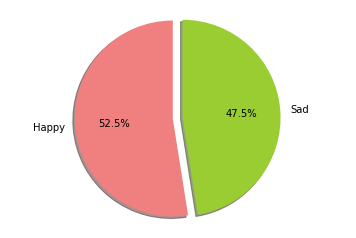

In [190]:
#Ratio of song mood
thappy = sum(df_test.loc[:, 'mood'] == 'happy')

tsad = sum(df_test.loc[:, 'mood'] == 'sad')

ttotal = len(df_test)

tsizes = (thappy,tsad)

tlabels = 'Happy','Sad'

texplode = (0.1, 0) 

tcolors = ['lightcoral', 'yellowgreen']

plt.pie(tsizes,explode=texplode,  labels=tlabels, colors=tcolors,
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

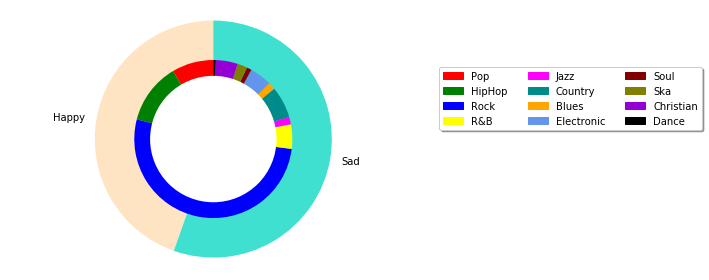

In [191]:
labels_genre = ['Pop','HipHop','Rock','R&B','Jazz','Country','Blues','Electronic','Soul','Ska','Christian','Dance']
sizes_genre = [tpop,thiphop,trock,trb,tjazz,tcnt,tbl,telec,tsoul,tska,tchrs,tdnc]

colors = ['bisque', 'turquoise']

colors_genre = ['red','green','blue','yellow','magenta','darkcyan','orange','cornflowerblue','maroon','olive','darkviolet','black']

# explode = (0.2,0.2) 
# explode_genre = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)

#Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True,radius=3)
plt.pie(sizes_genre, colors=colors_genre,startangle=90,radius=2 )

#Draw circle
centre_circle = plt.Circle((0,0),1.6,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()

pop_patch = mpatches.Patch(color= colors_genre[0], label='Pop')
hp_patch = mpatches.Patch(color= colors_genre[1], label='HipHop')
rk_patch = mpatches.Patch(color= colors_genre[2], label='Rock')
rb_patch = mpatches.Patch(color= colors_genre[3], label='R&B')
jz_patch = mpatches.Patch(color= colors_genre[4], label='Jazz')
cn_patch = mpatches.Patch(color= colors_genre[5], label='Country')
bl_patch = mpatches.Patch(color= colors_genre[6], label='Blues')
el_patch = mpatches.Patch(color= colors_genre[7], label='Electronic')
so_patch = mpatches.Patch(color= colors_genre[8], label='Soul')
sk_patch = mpatches.Patch(color= colors_genre[9], label='Ska')
ch_patch = mpatches.Patch(color= colors_genre[10], label='Christian')
dn_patch = mpatches.Patch(color= colors_genre[11], label='Dance')

plt.legend(handles=[pop_patch,hp_patch,rk_patch,rb_patch,jz_patch,cn_patch,bl_patch,el_patch,so_patch,
                    sk_patch,ch_patch,dn_patch], bbox_to_anchor=(1.05, 0.8), shadow=True, ncol=3)

plt.show()

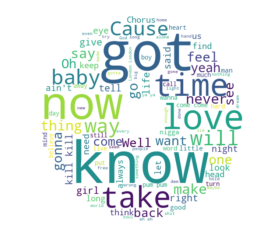

<Figure size 1080x1800 with 0 Axes>

In [232]:
#Wordcloud to identify words in the lyrics

text = " ".join(review for review in df_test.lyrics)

stopwords = set(STOPWORDS)

note_mask = np.array(Image.open(os.getcwd()+ "/img/img1.jpg"))

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=100,mask=note_mask).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=[15,25])
plt.show()